In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from IPython.display import display
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/Data/Manually Preprocessed Combined Dataset.csv'
heart_attack = pd.DataFrame(pd.read_csv(file_path))
heart_attack.head()

,Age,Sex,Blood Pressure,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Risk
0,40,1,140,289,82,0,0,0,1,0,...,9.838620,140396,35.198480,585,0,6,1,6,0,0
1,49,0,160,180,94,0,0,1,1,0,...,4.113294,278002,27.660505,757,0,7,-1,5,0,1
2,37,1,130,283,97,1,1,0,0,1,...,0.632775,277024,25.331487,542,7,5,1,3,1,0
3,48,0,138,214,95,0,0,0,0,0,...,2.679604,214444,30.413060,187,0,10,1,5,1,1
4,54,1,150,195,106,1,1,1,1,1,...,4.109055,68945,35.038942,677,2,7,1,5,0,0


In [4]:
unique_sex = heart_attack['Sex'].unique()
print(unique_sex)
unique = heart_attack['Hemisphere'].unique()
print(unique)
unique_country = heart_attack['Country'].unique()
print(unique_country)
unique_diet = heart_attack['Diet'].unique()
print(unique_diet)
unique_continent = heart_attack['Continent'].unique()
print(unique_continent)

[1 0]
[0 1]
[ 1 -1]
[ 0 -1  1]
[6 5 3 1 2 4]


In [5]:
# Extract features and target
X = heart_attack[['Sex', 'Age', 'Blood Pressure','Country','Stress Level','Medication Use', 'Previous Heart Problems', 'Diet', 'Physical Activity Days Per Week', 'Alcohol Consumption', 'Obesity', 'Smoking',
                'Family History', 'Diabetes', 'Hemisphere', 'Continent', 'Country','Exercise Hours Per Week', 'Sleep Hours Per Day', 'BMI', 'Sedentary Hours Per Day','Income', 'Triglycerides']].values
y = heart_attack['Heart Risk'].values.reshape(-1, 1)

# Normalize data using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Add intercept term to features
X_train_1 = np.hstack((np.ones((len(X_train), 1)), X_train))
X_test_1 = np.hstack((np.ones((len(X_test), 1)), X_test))

# Initialize linear regression model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train_1, y_train)

# Get predictions
y_linear_pred = linear_model.predict(X_test_1)

# Calculate metrics for linear regression
linear_mse = mean_squared_error(y_test, y_linear_pred)
r2_score = linear_model.score(X_test_1, y_test)


print('Linear Regression Metrics:')
print(f'Mean Squared Error (MSE): {linear_mse:.2f}')
print(f'R-squared (R2): {r2_score:.2f}')

Linear Regression Metrics:
Mean Squared Error (MSE): 0.23
R-squared (R2): 0.01


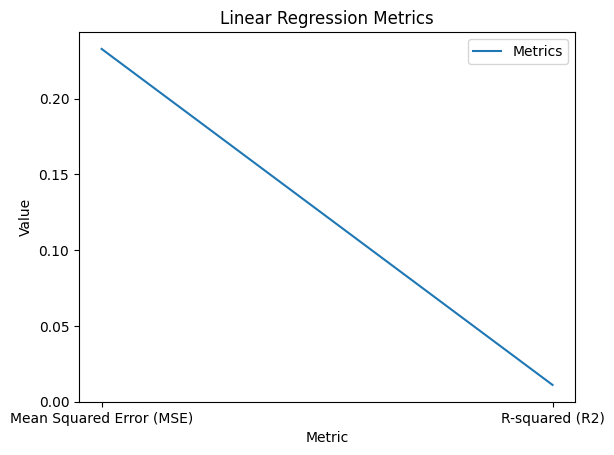

In [6]:
# Plotting data
fig, ax = plt.subplots()
ax.plot(['Mean Squared Error (MSE)', 'R-squared (R2)'], [linear_mse, r2_score])

ax.legend(['Metrics'])
ax.set_title('Linear Regression Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

plt.show()

In [7]:
# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=0)

# Fit the model
logreg_model.fit(X_train, y_train)

# Predictions for Logistic Regression
y_pred = logreg_model.predict(X_test)

# Calculate metrics for Logistic Regression
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('\nLogistic Regression Metrics:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nConfusion Matrix for Logistic Regression:')


Logistic Regression Metrics:
Accuracy: 0.63
Precision: 0.73
Recall: 0.03
F1 Score: 0.06

Confusion Matrix for Logistic Regression:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


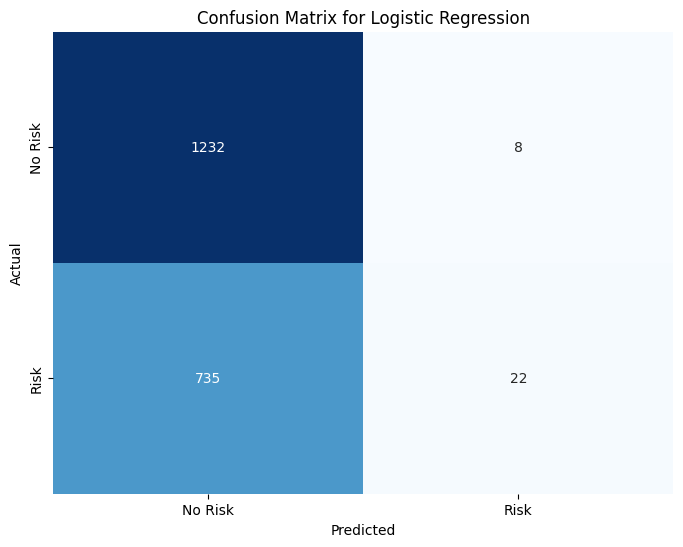

In [8]:
# Confusion matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train_1, y_train)

# Predictions for Gaussian Naive Bayes
y_nb_pred = nb_model.predict(X_test_1)

# Calculate metrics for Gaussian Naive Bayes
nb_accuracy = accuracy_score(y_test, y_nb_pred)
nb_precision = precision_score(y_test, y_nb_pred)
nb_recall = recall_score(y_test, y_nb_pred)
nb_f1 = f1_score(y_test, y_nb_pred)

print('\nGaussian Naive Bayes Metrics:')
print(f'Accuracy: {nb_accuracy:.2f}')
print(f'Precision: {nb_precision:.2f}')
print(f'Recall: {nb_recall:.2f}')
print(f'F1 Score: {nb_f1:.2f}')
print('\nConfusion Matrix for Gaussian Naive Bayes:')


Gaussian Naive Bayes Metrics:
Accuracy: 0.63
Precision: 0.53
Recall: 0.15
F1 Score: 0.23

Confusion Matrix for Gaussian Naive Bayes:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


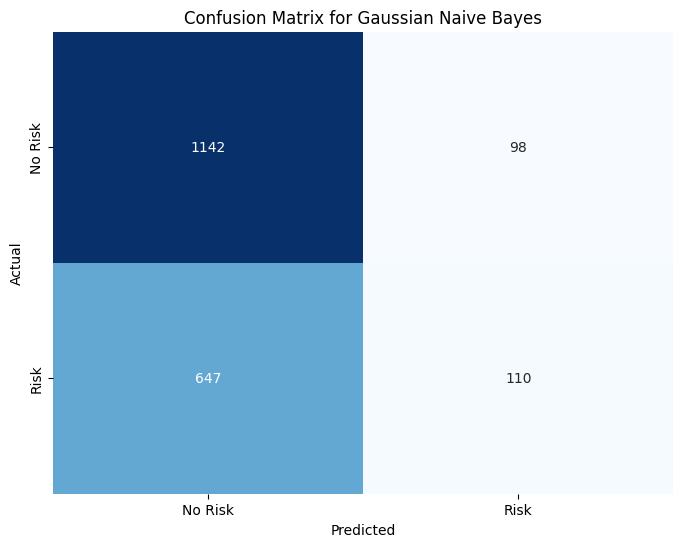

In [10]:

# Confusion matrix for Gaussian Naive Bayes
nb_conf_matrix = confusion_matrix(y_test, y_nb_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()